In [126]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### 1. Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required.

In [2]:
data = pd.read_csv('xAPI-Edu-Dataset.csv')

In [3]:
data.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
data.tail(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [5]:
data.shape

(480, 17)

In [6]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [8]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [9]:
print(data.gender.value_counts(),'\n',data.StageID.value_counts(),'\n',data.Semester.value_counts(),'\n',data.ParentAnsweringSurvey.value_counts(),'\n',data.ParentschoolSatisfaction.value_counts(),'\n',data.Class.value_counts())

M    305
F    175
Name: gender, dtype: int64 
 MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64 
 F    245
S    235
Name: Semester, dtype: int64 
 Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64 
 Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64 
 M    211
H    142
L    127
Name: Class, dtype: int64


In [10]:
print(data.Topic.value_counts(),'\n',data.NationalITy.value_counts())

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64 
 KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64


In [11]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


### 2. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

<Axes: xlabel='Class', ylabel='count'>

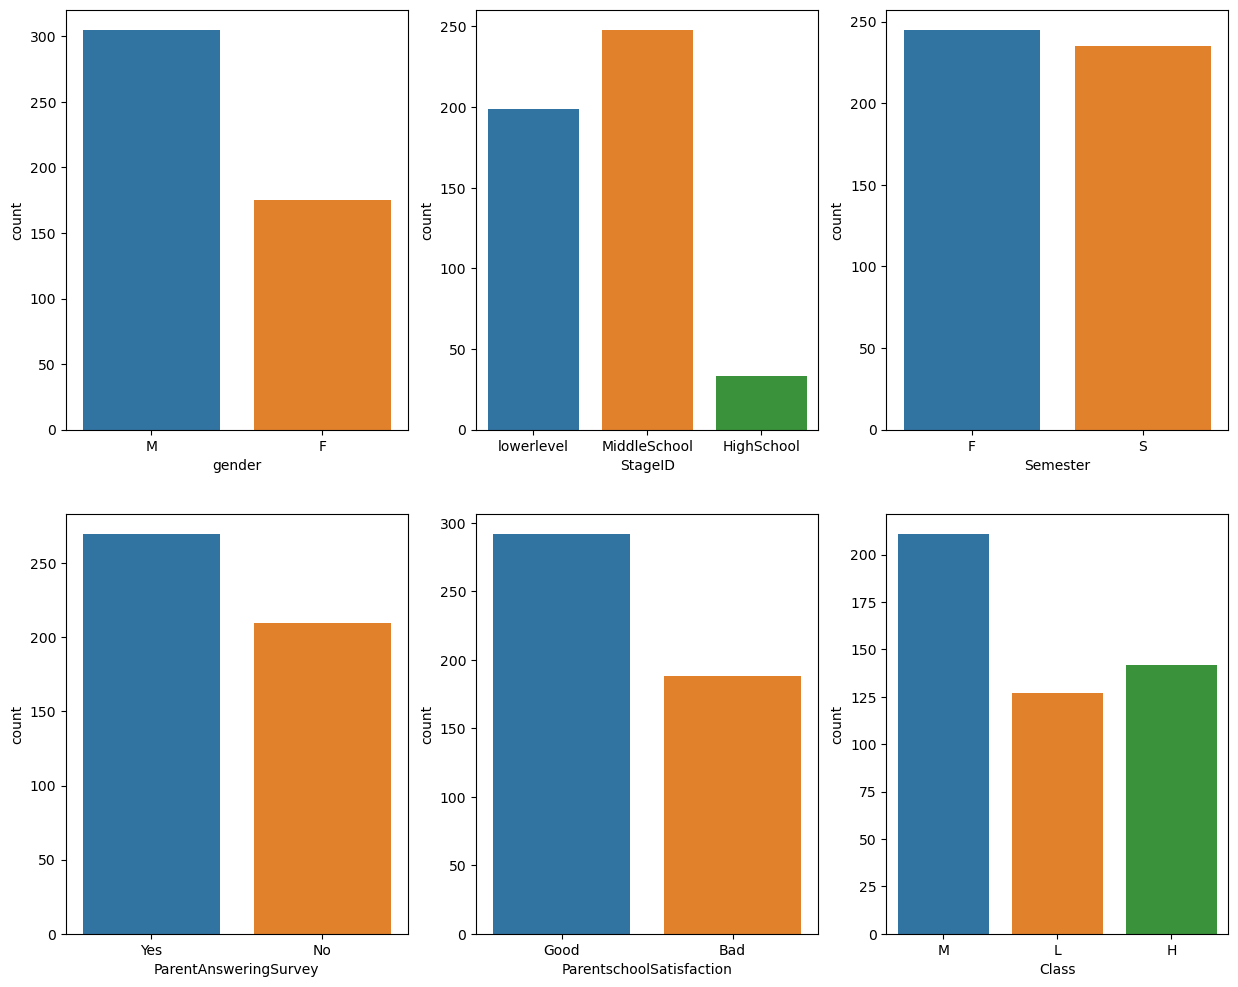

In [12]:
fig, ax  = plt.subplots(2,3,figsize=(15,12))

sns.countplot(x='gender', data=data, ax=ax[0][0])
sns.countplot(x='StageID', data=data, ax=ax[0][1])
sns.countplot(x='Semester', data=data, ax=ax[0][2])

sns.countplot(x='ParentAnsweringSurvey', data=data, ax=ax[1][0])
sns.countplot(x='ParentschoolSatisfaction', data=data, ax=ax[1][1])
sns.countplot(x='Class', data=data, ax=ax[1][2])

- Most of the students are Male (over 300) while Female is half of male (over 150)
- Most of them are from Middle School (around 240) followed by lower School and in the last is High School
- Students are almost same euqally divided b/w F and S
- Around 285 Parents are statisfied from school

<Axes: xlabel='count', ylabel='Topic'>

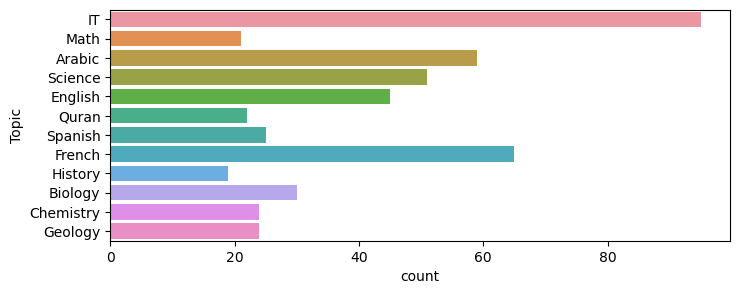

In [13]:
plt.figure(figsize=(8,3))
sns.countplot(y='Topic', data=data)

- Most students have opted for IT sector followed by Maths 

<Axes: xlabel='count', ylabel='NationalITy'>

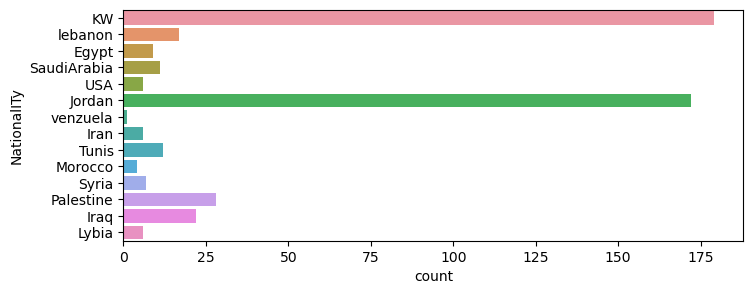

In [14]:
plt.figure(figsize=(8,3))
sns.countplot(y='NationalITy', data=data)

- Kuwait and Jordan have the most 

### 3. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<Axes: xlabel='gender', ylabel='Discussion'>

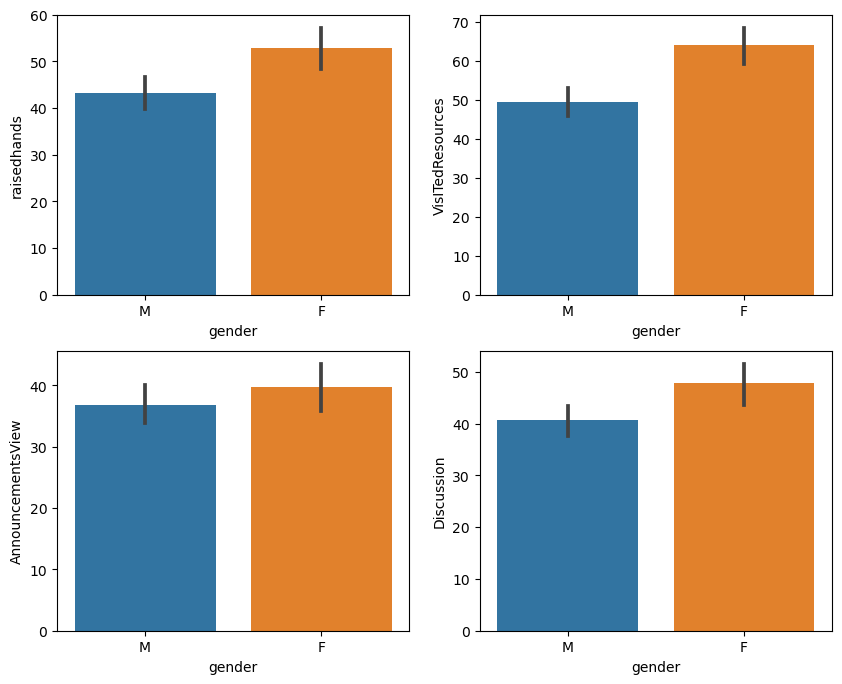

In [15]:
fig, ax  = plt.subplots(2,2,figsize=(10,8))
sns.barplot(x='gender',y='raisedhands', data=data, ax=ax[0][0])
sns.barplot(x='gender',y='VisITedResources', data=data, ax=ax[0][1])
sns.barplot(x='gender',y='AnnouncementsView', data=data, ax=ax[1][0])
sns.barplot(x='gender',y='Discussion', data=data, ax=ax[1][1])

<Axes: xlabel='Class', ylabel='Discussion'>

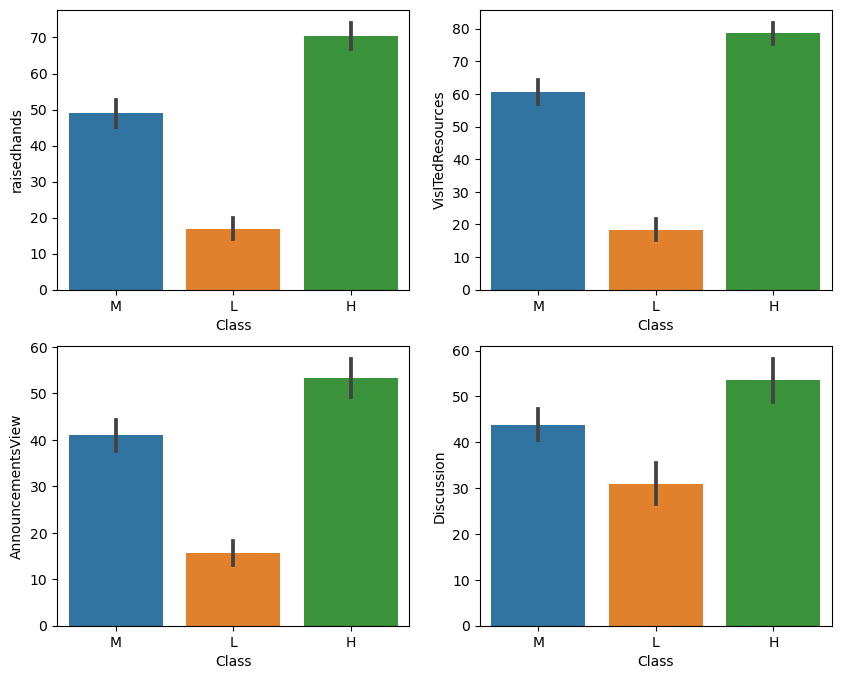

In [16]:
fig, ax  = plt.subplots(2,2,figsize=(10,8))
sns.barplot(x='Class',y='raisedhands', data=data, ax=ax[0][0])
sns.barplot(x='Class',y='VisITedResources', data=data, ax=ax[0][1])
sns.barplot(x='Class',y='AnnouncementsView', data=data, ax=ax[1][0])
sns.barplot(x='Class',y='Discussion', data=data, ax=ax[1][1])

<Axes: xlabel='Topic', ylabel='count'>

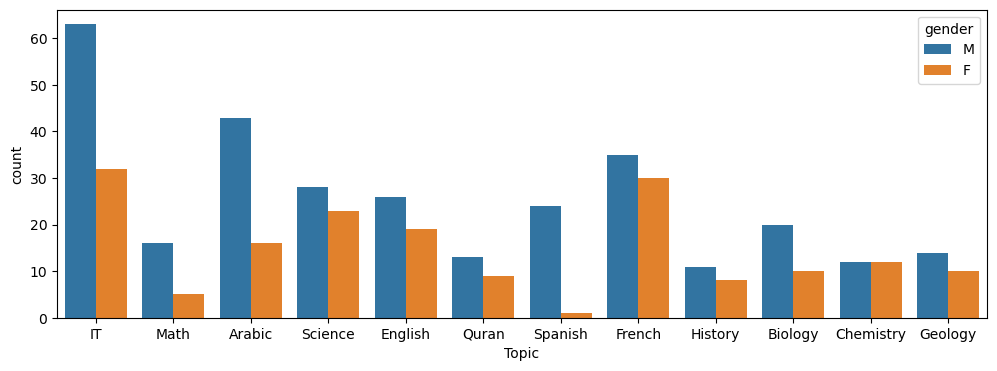

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(x='Topic',hue='gender', data=data)

<Axes: xlabel='NationalITy', ylabel='count'>

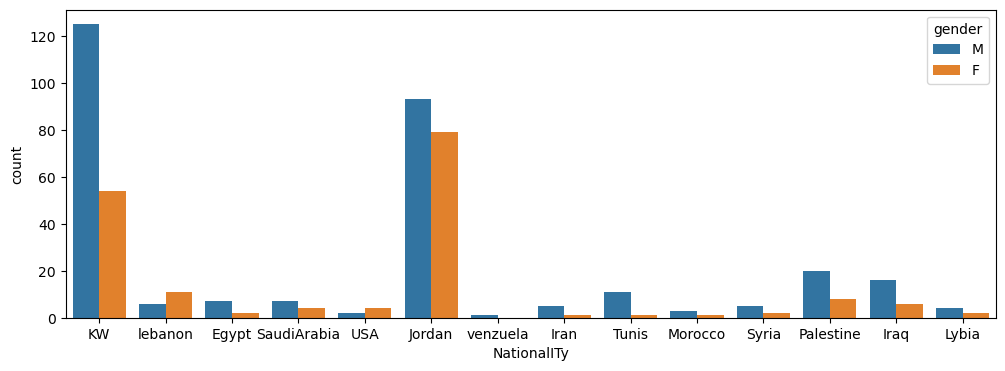

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(x='NationalITy',hue='gender', data=data)

### 4. Visualize categorical variables with numerical variables and give conclusions?

<Axes: xlabel='Class', ylabel='Discussion'>

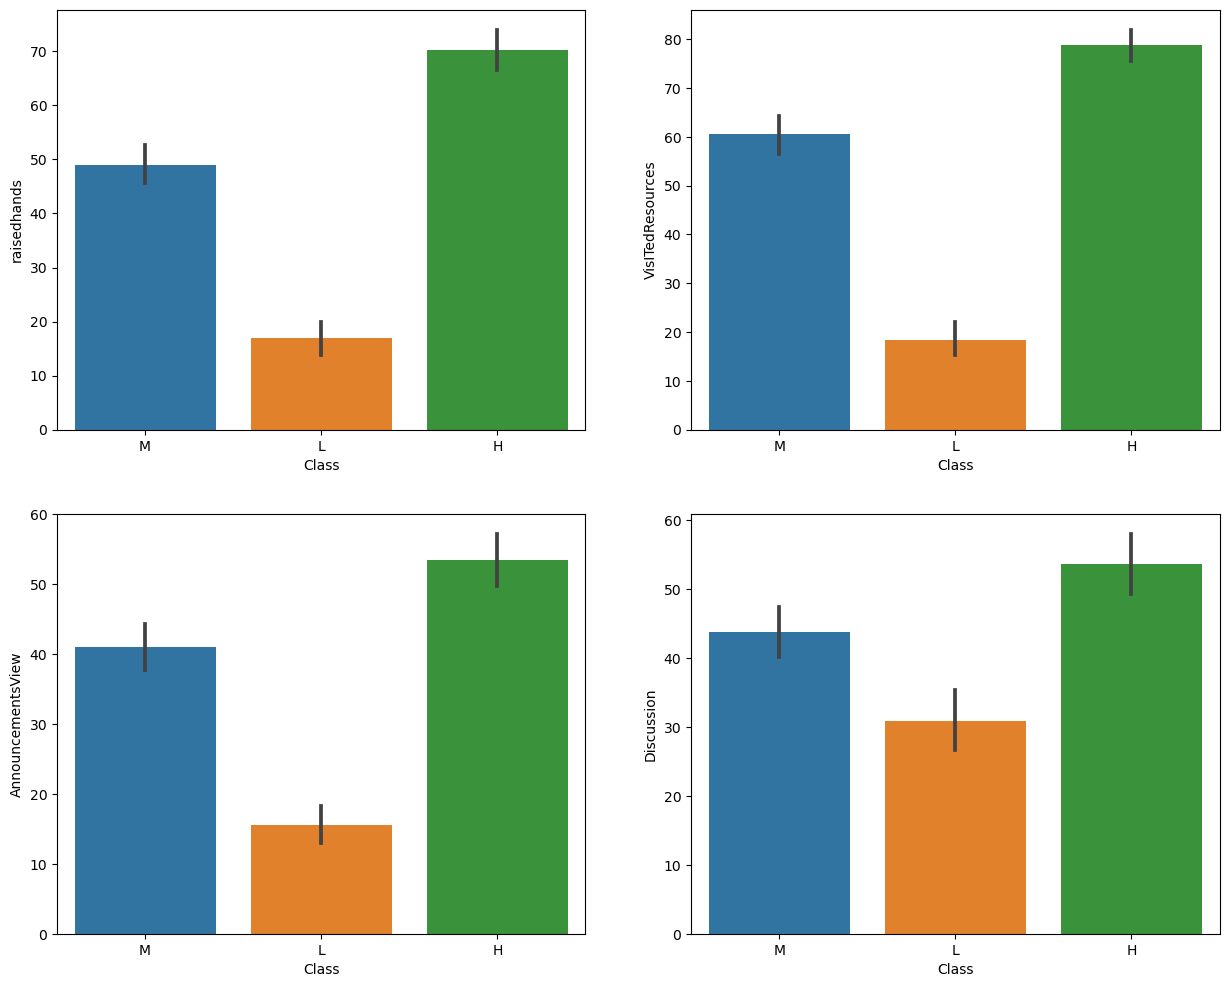

In [19]:
# checking for class and other nuermical values
fig, ax  = plt.subplots(2,2,figsize=(15,12))
sns.barplot(x='Class',y='raisedhands', data=data, ax=ax[0][0])
sns.barplot(x='Class',y='VisITedResources', data=data, ax=ax[0][1])
sns.barplot(x='Class',y='AnnouncementsView', data=data, ax=ax[1][0])
sns.barplot(x='Class',y='Discussion', data=data, ax=ax[1][1])

From above we can notice that Class H has the maximun number of particitipation (raisehands, visited reources, accouncement views & discussion) as compared to other class M & L

In [20]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<Axes: xlabel='Semester', ylabel='Discussion'>

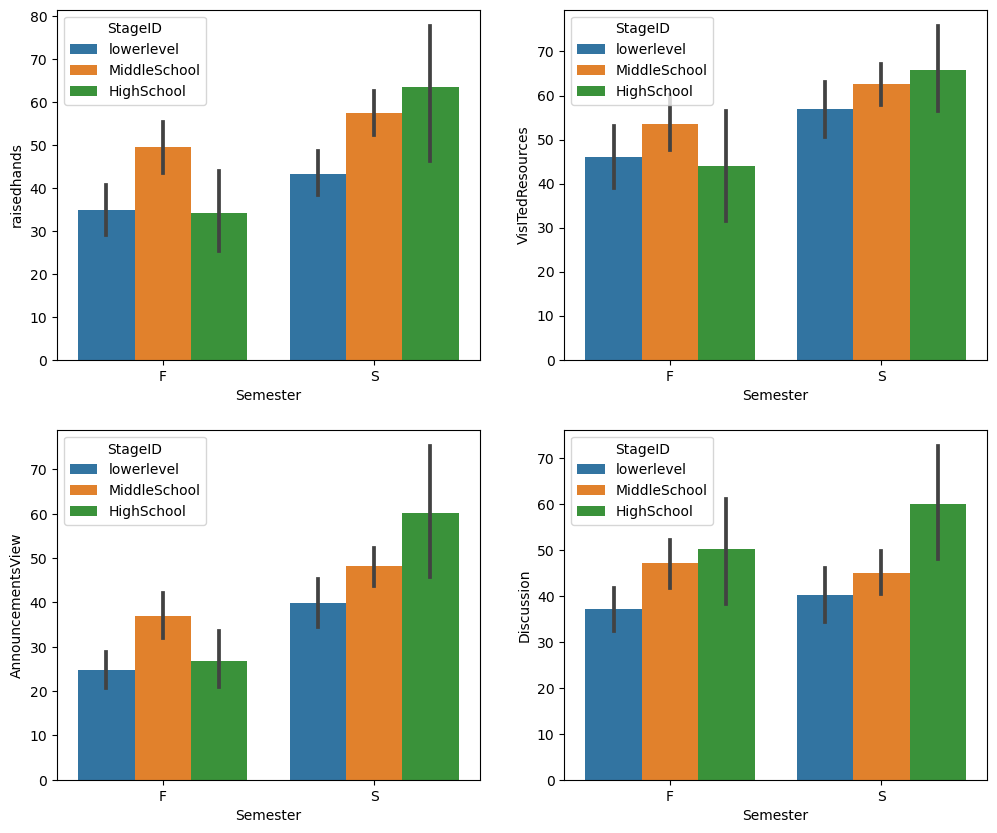

In [21]:
# checking for semester and numerical values relations
fig, ax  = plt.subplots(2,2,figsize=(12,10))
sns.barplot(x='Semester',y='raisedhands', data=data, ax=ax[0][0], hue='StageID')
sns.barplot(x='Semester',y='VisITedResources', data=data, ax=ax[0][1], hue='StageID')
sns.barplot(x='Semester',y='AnnouncementsView', data=data, ax=ax[1][0], hue='StageID')
sns.barplot(x='Semester',y='Discussion', data=data, ax=ax[1][1], hue='StageID')

- Second semester students of highschool are more engaged in discussion, raisehands, visited reources, accouncement views 
- Mostly First semeseter students of Middle School are engaged in raisehands, visited reources, accouncement views

### 5. From the above result, what are the factors that leads to get low grades of the students?

In [22]:
avg_raiseHands = data['raisedhands'].mean()
avg_visitedResources = data['VisITedResources'].mean()
avg_announcementsView = data['AnnouncementsView'].mean()

In [31]:
# Filter students with features lower than the averages
filtered_data = data[(data['raisedhands'] >= avg_raisedhands) &
                     (data['VisITedResources'] >= avg_VisITedResources) &
                     (data['AnnouncementsView'] >= avg_AnnouncementsView) &
                     (data['Class'] == 'L')]
filtered_data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


In [35]:
summary_stats = filtered_data.describe()
summary_stats

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,2.00000,2.000000,2.000000,2.000000
mean,73.50000,74.000000,65.000000,39.500000
std,2.12132,2.828427,1.414214,0.707107
min,72.00000,72.000000,64.000000,39.000000
25%,72.75000,73.000000,64.500000,39.250000
50%,73.50000,74.000000,65.000000,39.500000
75%,74.25000,75.000000,65.500000,39.750000
max,75.00000,76.000000,66.000000,40.000000


In [46]:
data['numeric_class'] = [1 if data.loc[i,'Class'] == 'L' else 2 if data.loc[i,'Class'] == 'M' else 3 for i in range(len(data))]

In [52]:
data.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1


Text(0.5, 1.0, 'Relation with Father or Mother Affects Student Success')

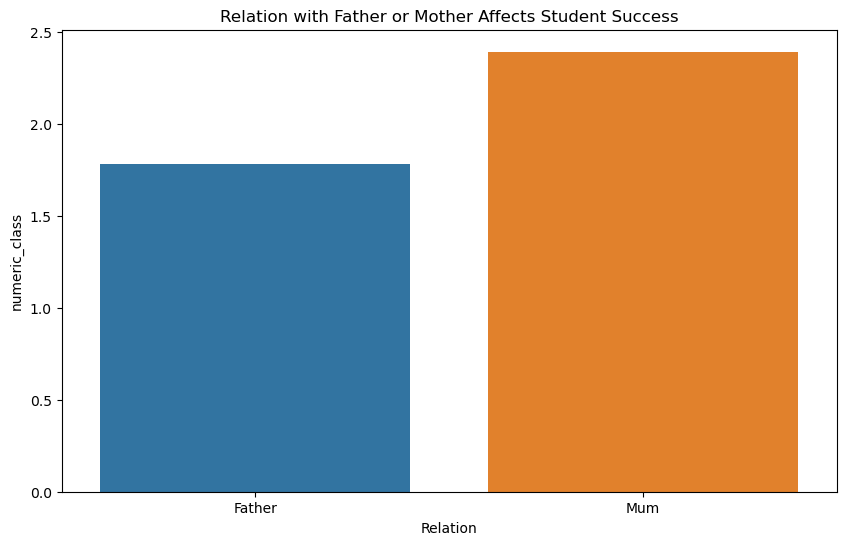

In [51]:
# Calculate the average numeric class for each unique value in the 'Relation' column
relation_grade_ave = data.groupby('Relation')['numeric_aclass'].mean().reset_index()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Relation', y='numeric_class', data=relation_grade_ave)
plt.title('Relation with Father or Mother Affects Student Success')


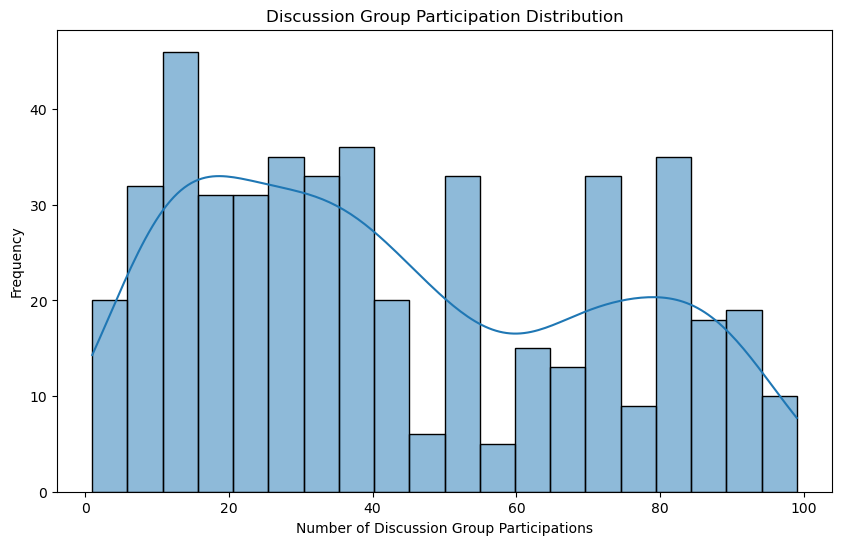

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Discussion'], bins=20, kde=True)
plt.title('Discussion Group Participation Distribution')
plt.xlabel('Number of Discussion Group Participations')
plt.ylabel('Frequency')
plt.show()

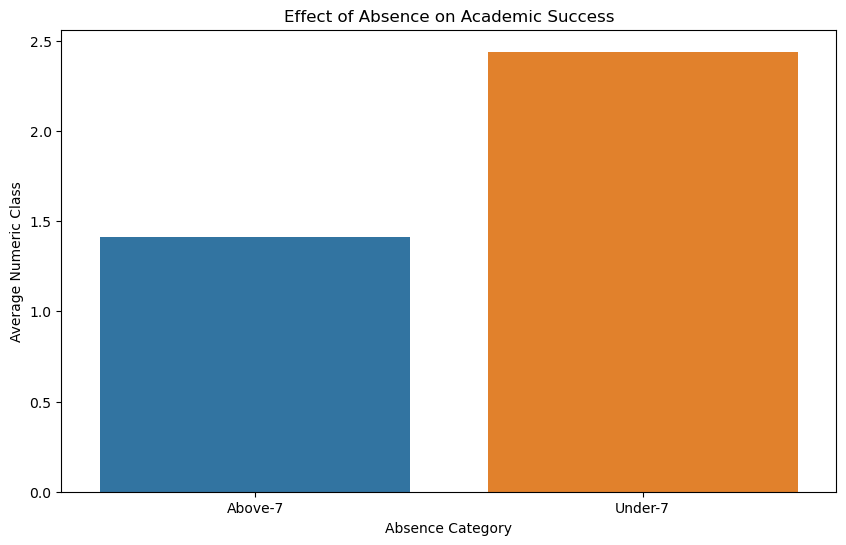

In [68]:
absence_day_ave = data.groupby('StudentAbsenceDays')['numeric_class'].mean().reset_index()

# Create a bar plot to visualize the effect of absence on success
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='StudentAbsenceDays', y='numeric_class', data=absence_day_ave)
plt.title('Effect of Absence on Academic Success')
plt.xlabel('Absence Category')
plt.ylabel('Average Numeric Class')
plt.show()

### 6. Build classification model using Logistic Regression and present it's confusion matrix and classification report.

In [72]:
# Selecting the columns you want to keep (excluding the target variable 'Class')
data1 = data.drop('Class', axis=1)

# Creating dummy variables for categorical columns, dropping the first category as reference
data_with_dummies = pd.get_dummies(data1, drop_first=True)

In [73]:
data_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [74]:
x = data_with_dummies.drop(['numeric_class'],axis = 1)
y = data_with_dummies['numeric_class']

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [78]:
x = scaler.fit_transform(x)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [83]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [85]:
y_pred = log.predict(x_test)

In [86]:
y_pred

array([2, 2, 3, 1, 1, 1, 1, 3, 3, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 3,
       2, 3, 2, 2, 3, 2, 1, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 3, 1, 3, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 1, 2, 1, 3, 3], dtype=int64)

In [115]:
confusion_matrix = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [116]:
print('Accuracy Score:',accuracy)

Accuracy Score: 0.71875


### 7. Justify the model. Tune the model using various techniques, if need be.

In [134]:
# Varaince Threshold

from sklearn.feature_selection import VarianceThreshold
import numpy as np 

var = VarianceThreshold(threshold=0.025)
X_trans = var.fit_transform(x)

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_trans,y, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_var_thresh = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_var_thresh.predict(X_test)

Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           1       0.85      0.74      0.79        39
           2       0.75      0.74      0.75        70
           3       0.66      0.77      0.71        35

    accuracy                           0.75       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.76      0.75      0.75       144

